In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import pickle

In [3]:
customer_data=pd.read_csv(r"D:\customer-segmentation-dataset\Mall_Customers.csv")

In [4]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer_data.set_index('CustomerID',inplace=True)

In [6]:
customer_data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [8]:
customer_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


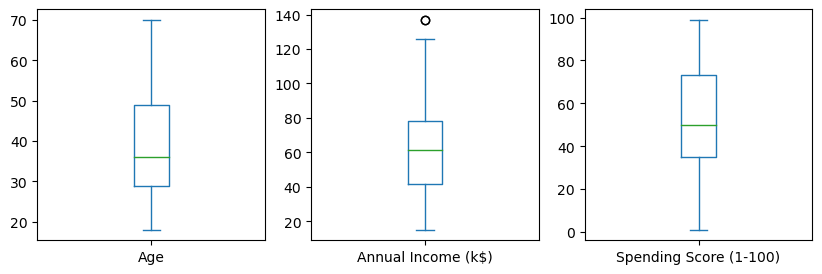

In [9]:
column_name=['Age','Annual Income (k$)','Spending Score (1-100)']
fig,ax=plt.subplots(1,3,figsize=(10,3))
for i,j in zip(column_name,ax.ravel()):
    customer_data[i].plot(kind='box',ax=j)

In [10]:
customer_data['Annual Income (k$)'].idxmax()

199

In [11]:
customer_data.iloc[199]

Gender                    Male
Age                         30
Annual Income (k$)         137
Spending Score (1-100)      83
Name: 200, dtype: object

<Axes: >

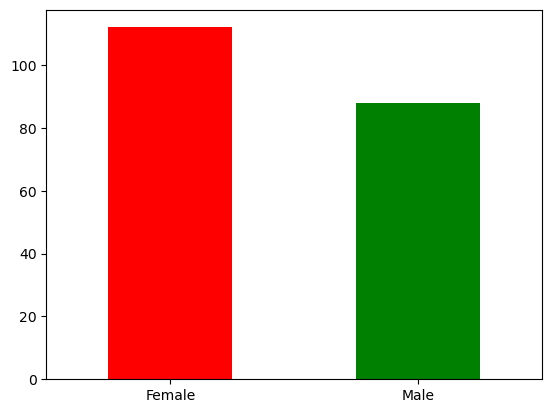

In [12]:
customer_data['Gender'].value_counts().plot(kind='bar',rot=0,color=['r','g'])

In [13]:
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [14]:
customer_data['Gender']=pd.get_dummies(customer_data['Gender'],drop_first=True,dtype='int')

In [15]:
customer_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


In [16]:
x=customer_data.iloc[:,:].values

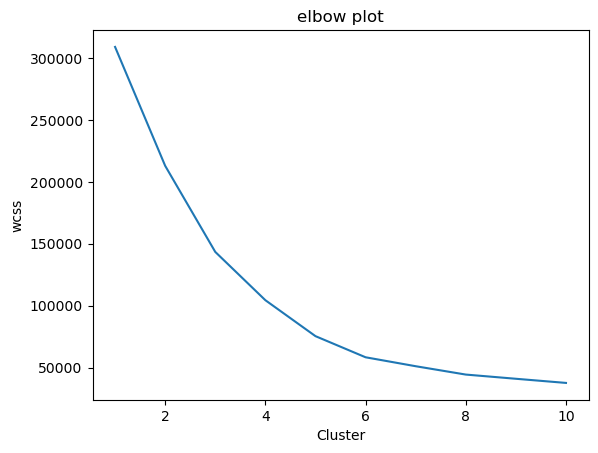

In [17]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('elbow plot')
plt.xlabel('Cluster')
plt.ylabel('wcss')
plt.show()    

In [18]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans.fit(x)
y_kmeans=kmeans.predict(x)

In [19]:
y_kmeans

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [20]:
x[y_kmeans==0,0]

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0], dtype=int64)

In [21]:
x[0,2]

15

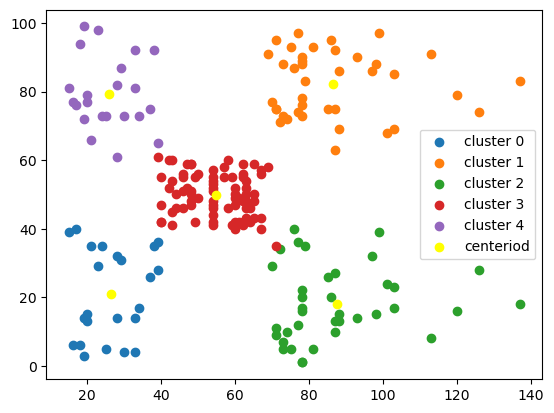

In [22]:
plt.scatter(x=x[y_kmeans==0,2],y=x[y_kmeans==0,3],label='cluster 0')
plt.scatter(x=x[y_kmeans==1,2],y=x[y_kmeans==1,3],label='cluster 1')
plt.scatter(x=x[y_kmeans==2,2],y=x[y_kmeans==2,3],label='cluster 2')
plt.scatter(x=x[y_kmeans==3,2],y=x[y_kmeans==3,3],label='cluster 3')
plt.scatter(x=x[y_kmeans==4,2],y=x[y_kmeans==4,3],label='cluster 4')
plt.scatter(x=kmeans.cluster_centers_[:,2],y=kmeans.cluster_centers_[:,3],c='yellow',label='centeriod')
plt.legend()
plt.show()

In [24]:
pickle.dump(kmeans,open('Seg_model.pkl','wb'))